## Tag-to-Image Recommendation Demo

**Nov 13, 2019**

---

In [9]:
import os
import sys
import json
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from src import constants
# ! pip install textacy
import textacy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src.nlp_util.textacy_util import *
from src.preprocessing import process_utils
from src.models import t2i_recsys

In [2]:
#get training path
train_dir = constants.TRAIN_DIR
clean_dir = constants.CLEAN_DIR
art_prefix = constants.Text_Prefix
img_prefix = constants.Media_Prefix
#tag types
tag_types = ['org', 'place', 'subject','person']
article_summary = pd.read_csv(f'{train_dir}/{art_prefix}summary.csv')
image_summary =  pd.read_csv(f'{train_dir}/{img_prefix}summary.csv')
#preview dir
preview_dir = f'{constants.DATA_DIR}/preview'

In [27]:
###helper functions for demo
def if_valid(csv_entry):
    "check whether an entry is nan or empty string"
    try:
        np.isnan(csv_entry)
        return False
    except:
        if csv_entry in ['','nan']:
            return False
        else:
            return True
        
def get_headline(idx):
    "get image caption"
    at = list()
    for tt in tag_types:
        data = pd.read_csv(f'{clean_dir}/{img_prefix}summary.csv')
        subset = data[data.id == idx]
    return subset.headline.values

def get_tags(idx, prefix, tag_types):
    "get list of tags"
    at = list()
    for tt in tag_types:
        data = pd.read_csv(f'{clean_dir}/{prefix}{tt}.csv')
        subset = data[data.id == idx]
        tag_list = subset[f'{tt}_tag'].values
        for t in tag_list:
            #check validity of tag
            if if_valid(t):
                at.append(t)
    return at

def output_img(idx_list):
    for idx in idx_list:
        print(f'ID: {idx}')
        print(f'HEADLINE: {get_headline(idx)[0]}')
        print('TAGS: ', get_tags(idx, img_prefix, tag_types))
        img_file = f'{preview_dir}/{idx}.jpg'
        fig, ax = plt.subplots()
        img = plt.imread(img_file)
        ax.imshow(img)
        plt.show()

def prediction_demo(exp_id, recommend_size, remove_original):
    
    print(f'Preping prediction for article id {exp_id} ...\n')
    #get full text for example
    text = article_summary[article_summary.id == exp_id].full_text.values[0]
    #change to spacy doc string
    en = textacy.load_spacy_lang("en_core_web_sm", disable=("parser",))
    doc = textacy.make_spacy_doc(text, lang=en)
    #get article tags
    exp_tags = get_tags(exp_id, art_prefix, tag_types)
    print(f'Article tags: \n')
    print(exp_tags)
    #get textrank tags
    _, textrank_score, art_ranked_tags = extract_textrank_from_text(text, tagging_API_entities = exp_tags)
    print()
    print(f'Ranked Tags:')
    print(art_ranked_tags, '\n')
    #recommend images
    t2i_object = t2i_recsys.T2I(exp_id, art_ranked_tags, list(textrank_score))
    print(f'Searching for associated images ...\n')
    t2i_object.get_associated_images()
    print(f'Recommending {recommend_size} images ...\n')
    predicted_img_idx = t2i_object.predict(output_size = recommend_size, remove_original = remove_original)
    print(f'Recommended images: ')
    output_img(predicted_img_idx) 
    print(f'True images: ')
    output_img(t2i_object.img_idx_omit)


Preping prediction for article id 52979c39f01a412cba0cf808a1661611 ...

Article tags: 

['European Union', 'Syria', 'Middle East', 'Europe', 'United Kingdom', 'Western Europe', 'United States', 'North America', 'Gibraltar', 'Iran', 'Business', 'General news', 'International relations', 'Government and politics', 'Oil and gas industry', 'Energy industry', 'Oil and gas transportation', 'Donald Trump', 'Fabian Picardo']

Ranked Tags:
['Gibraltar' 'Europe' 'European Union' 'Iran' 'Donald Trump'
 'United States' 'Syria' 'Fabian Picardo'] 

Searching for associated images ...

Recommending 3 images ...

Recommended images: 
ID: 813da71696ec45dab9c6e828595661fb
HEADLINE: Pictures Of The Week Photo Gallery
TAGS:  ['United States', 'North America', 'Tehran', 'Iran', 'Middle East', 'Gibraltar', 'Western Europe', 'Europe', 'Donald Trump']


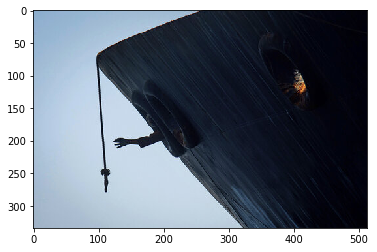

ID: 194d44229c954c6da9d5ef7e2e5e6c31
HEADLINE: Gibraltar Persian Gulf Tension
TAGS:  ['British armed forces', 'United Kingdom government', 'Royal Navy', 'Tehran', 'Iran', 'Middle East', 'United States', 'North America', 'Syria', 'Persian Gulf', 'Gibraltar', 'Western Europe', 'Europe', 'Milan', 'Italy', 'London', 'England', 'United Kingdom']


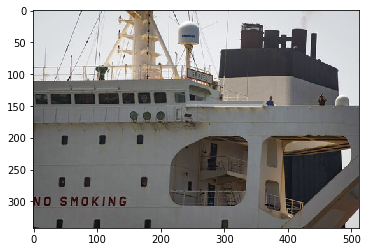

ID: 102abc0b6a414350955ef089dc91520c
HEADLINE: Gibraltar Persian Gulf Tension
TAGS:  ['British armed forces', 'United Kingdom government', 'Royal Navy', 'United States', 'North America', 'Milan', 'Italy', 'Western Europe', 'Europe', 'Tehran', 'Iran', 'Middle East', 'London', 'England', 'United Kingdom', 'Persian Gulf', 'Syria', 'Gibraltar']


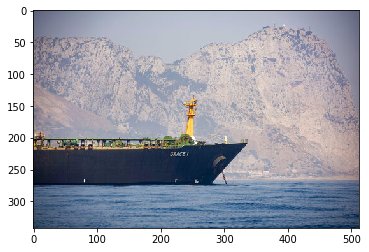

True images: 
ID: f876658d555c469a96542f1fe06cd46b
HEADLINE: Gibraltar Persian Gulf Tension
TAGS:  ['United States', 'North America', 'Gibraltar', 'Western Europe', 'Europe', 'Persian Gulf']


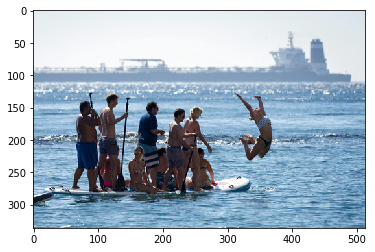

ID: 51d92dbeba2c4c34a04077b506f0a750
HEADLINE: Gibraltar Persian Gulf Tension
TAGS:  ['United States', 'North America', 'Gibraltar', 'Western Europe', 'Europe', 'Persian Gulf']


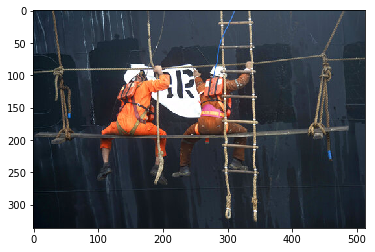

ID: 32cc1a2b5f3f45c0b59af5e6f63e38fa
HEADLINE: Gibraltar Persian Gulf Tension
TAGS:  ['Gibraltar', 'Western Europe', 'Europe', 'United States', 'North America', 'Milan', 'Italy', 'Syria', 'Middle East', 'Persian Gulf']


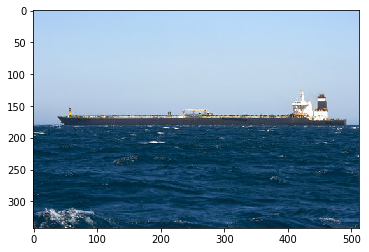

In [37]:
## random example
exp_id = np.random.choice(article_summary.id.values)
prediction_demo(exp_id, 3, False)

Preping prediction for article id 680f273eacb74008a3529baa006e37b1 ...

Getting ranked article tags ...


Ranked Tags:
['Henryk Jankowski' 'Gdansk' 'Poland'] 

Searching for associated images ...

Recommending 3 images ...

Recommended images: 
ID: 409dccdb1b474e64b5c72321841d180a
HEADLINE: Poland Church Sex Abuse
TAGS:  ['Gdansk', 'Poland', 'Eastern Europe', 'Europe', 'Religious scandals', 'Religious issues', 'Religion', 'Social affairs', 'Social issues', 'Sexual abuse by clergy', 'Sexual abuse', 'Violent crime', 'Crime', 'General news', 'Henryk Jankowski']


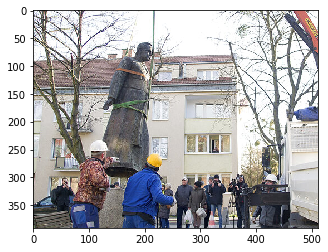

ID: d80d615586694e98b922274d0e7385ef
HEADLINE: Poland Facing Clerical Abuse
TAGS:  ['Poland', 'Eastern Europe', 'Europe', 'Gdansk', 'Henryk Jankowski']


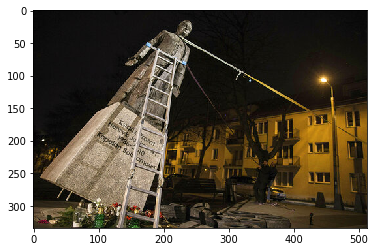

ID: 39e51b376a8c4e34883736855b3c2bf9
HEADLINE: Poland WWII Site
TAGS:  ['Gdansk', 'Poland', 'Eastern Europe', 'Europe', 'World War II']


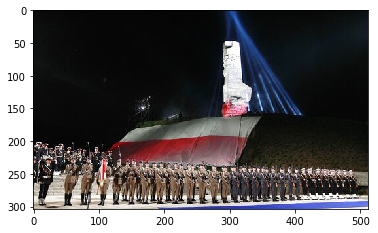

True images: 
ID: 37c301b3d18c4a0dacce05a393b41591
HEADLINE: Poland Church Sex Abuse
TAGS:  ['Poland government', 'Poland', 'Eastern Europe', 'Europe', 'Gdansk', 'Government and politics', 'Sexual abuse', 'Violent crime', 'Crime', 'General news', 'Sexual abuse by clergy', 'Religious issues', 'Religion', 'Social affairs', 'Social issues', 'Religious scandals', 'Lech Walesa', 'Henryk Jankowski']


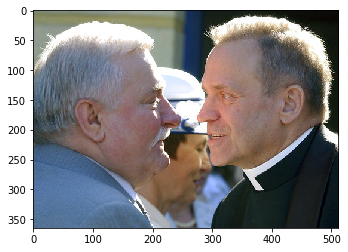

ID: de7511e6376642548061444bd9b9df0d
HEADLINE: Poland Church Sex Abuse
TAGS:  ['Poland', 'Eastern Europe', 'Europe', 'Gdansk', 'Sexual abuse', 'Violent crime', 'Crime', 'General news', 'Sexual abuse by clergy', 'Religious issues', 'Religion', 'Social affairs', 'Social issues', 'Religious scandals', 'Henryk Jankowski']


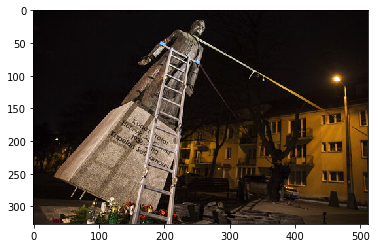

In [4]:
### good example
### 680f273eacb74008a3529baa006e37b1
exp_id = '680f273eacb74008a3529baa006e37b1'
prediction_demo(exp_id, 3)

Preping prediction for article id cf4dbebfb82c40e3a650bdcf26f68a68 ...

Article tags: 

['Greenland', 'North America', 'General news', 'Science', 'Glaciology', 'Earth science', 'Animals', 'Climate', 'Environment and nature', 'Climatology', 'Atmospheric science', 'Space exploration', 'Glaciers', 'Rising sea levels', 'Climate change', 'Environmental concerns', 'Environment', 'Weather patterns', 'Oceans', 'Sled dog racing', 'Sports', 'Weather', 'David Holland']

Ranked Tags:
['Greenland' 'David Holland' 'Science' 'North America'] 

Searching for associated images ...

Recommending 3 images ...

Recommended images: 
ID: 605cc7e64365402badb229511fd1f12e
HEADLINE: Science Teacher
TAGS:  ['United States', 'North America', 'Winona', 'Minnesota', 'Math and science education', 'Science', 'School curricula', 'Education', 'Social affairs']


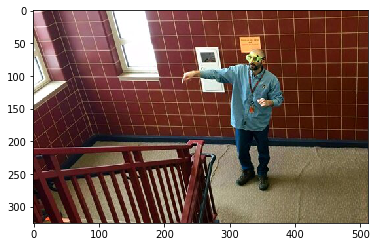

ID: 31b9a4eab7b14f8c9c8604317c5cbc05
HEADLINE: Science Teacher
TAGS:  ['Winona', 'Minnesota', 'United States', 'North America', 'Math and science education', 'Science', 'School curricula', 'Education', 'Social affairs']


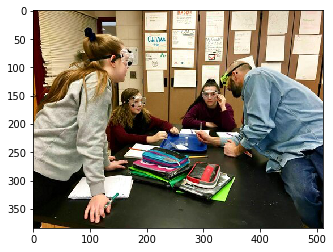

ID: e841a86417264cfeb1d76098ae3608b7
HEADLINE: Science Says Genome Payoffs
TAGS:  ['United States', 'North America', 'Genomics', 'Biology', 'Science']


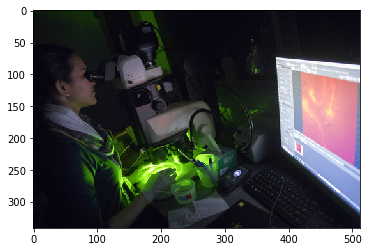

True images: 
ID: d359208e7f304fcab4f0798530a523c7
HEADLINE: APTOPIX Greenland Glaciers On the Edge
TAGS:  ['Glaciers', 'Environment and nature']


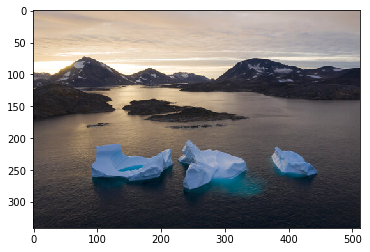

ID: 35331d3527b5429cb5fd9d077bda183d
HEADLINE: Greenland Glaciers On the Edge
TAGS:  ['Glaciers', 'Environment and nature', 'David Holland']


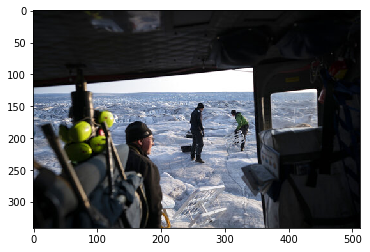

ID: a07f259f152e4b62a854650f2486925a
HEADLINE: Greenland Glaciers On the Edge
TAGS:  ['Glaciers', 'Environment and nature']


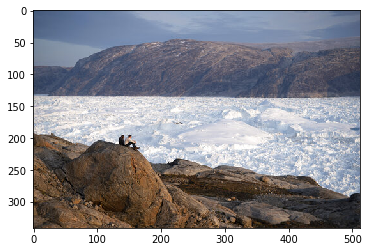

ID: 857d5182a01644d392d1ebd5f0acbc8c
HEADLINE: Greenland Glaciers On the Edge
TAGS:  ['Glaciers', 'Environment and nature']


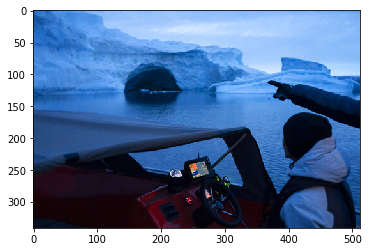

ID: 073668805fe041f4bc53f65e6a3c3906
HEADLINE: APTOPIX Greenland Glaciers On the Edge
TAGS:  ['Glaciers', 'Environment and nature']


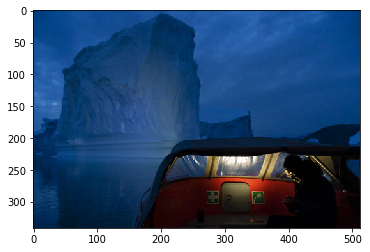

ID: 36a9f8d5248a4ce7803c69882805e7d3
HEADLINE: Greenland Glaciers On the Edge
TAGS:  ['Glaciers', 'Environment and nature']


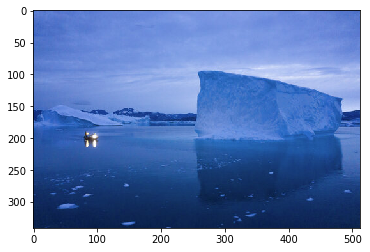

ID: d19e260352754b71bf602b766c6a66f0
HEADLINE: Greenland Glaciers On the Edge
TAGS:  ['Glaciers', 'Environment and nature']


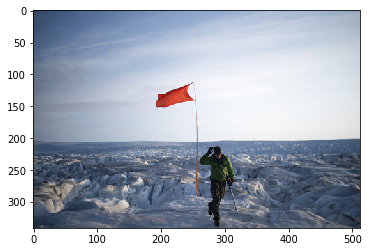

ID: aed7e4e761bf432ba47b299a575f3140
HEADLINE: Greenland Glaciers On the Edge
TAGS:  ['Glaciers', 'Environment and nature']


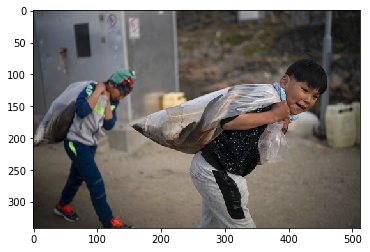

ID: 5835d4457c244d3d9032e1037e524d7c
HEADLINE: Greenland Glaciers On the Edge
TAGS:  ['Glaciers', 'Environment and nature']


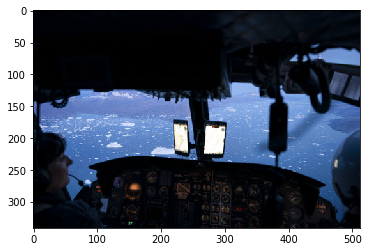

In [36]:
### bad example
### cf4dbebfb82c40e3a650bdcf26f68a68
exp_id = 'cf4dbebfb82c40e3a650bdcf26f68a68'
prediction_demo(exp_id, 3, False)

Preping prediction for article id c879d2f00d8740e5abe4fe5d1ae430d9 ...

Getting ranked article tags ...


Ranked Tags:
['Detroit'] 

Searching for associated images ...

Recommending 3 images ...

Recommended images: 
ID: 7fdbc9d7bc25453687555b51066cfe1c
HEADLINE: Failing Detroit Streetlights
TAGS:  ['Detroit', 'Michigan', 'United States', 'North America']


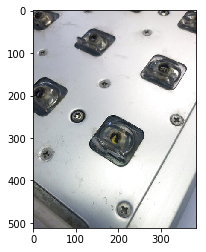

ID: 598ccb7d7f0346d984677f6adef4f426
HEADLINE: Judge-Birthday
TAGS:  ['United States', 'North America', 'Detroit', 'Michigan']


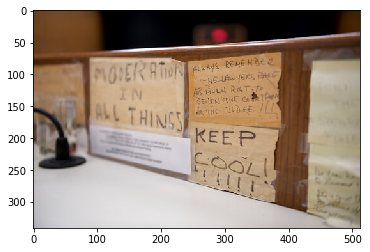

ID: 4d8953a0ca5e4177991751fcacd5ab08
HEADLINE: Police Raid-Girl Killed
TAGS:  ['United States', 'North America', 'Michigan', 'Detroit', 'Crime', 'General news', 'Homicide', 'Violent crime']


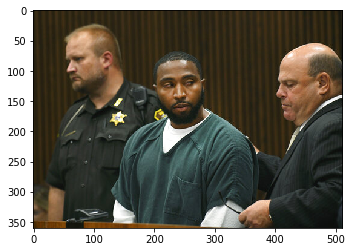

True images: 
ID: fde7f685dc8e48d598da84aef65ee469
HEADLINE: Detroit Officer Dies
TAGS:  ['Michigan', 'United States', 'North America', 'Detroit']


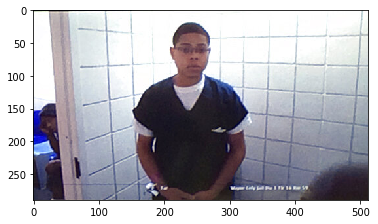

In [6]:
### difficult-to-tell example
### c879d2f00d8740e5abe4fe5d1ae430d9
exp_id = 'c879d2f00d8740e5abe4fe5d1ae430d9' 
prediction_demo(exp_id, 3)

Preping prediction for article id a08454bb45204e18aa81830942e835cd ...

Article tags: 

['Italy', 'Western Europe', 'Europe', 'Arts and entertainment', 'General news', 'Movies', 'Political activism', 'Political issues', 'Government and politics', 'Human rights and civil liberties', 'Social issues', 'Social affairs', 'Venice Film Festival', 'Entertainment', 'Freedom of speech', 'Government surveillance', 'Film festivals', 'Celebrity causes', 'Celebrity', 'Anthony Mackie', 'Lindsey Bahr', 'Kristen Stewart', 'Benedict Andrews', 'Zazie Beetz']

Ranked Tags:
['Lindsey Bahr' 'Venice Film Festival' 'Kristen Stewart'
 'Benedict Andrews' 'Anthony Mackie' 'Zazie Beetz' 'Italy'] 

Searching for associated images ...

Recommending 5 images ...

Recommended images: 
ID: 58addd2306104a70a4f94db290d3013e
HEADLINE: APTOPIX Italy Venice Film Festival 2019 The Truth Red Carpet
TAGS:  ['Italy', 'Western Europe', 'Europe', 'Milan', 'Celebrity', 'Entertainment', 'Arts and entertainment', 'Movies', 'Movie p

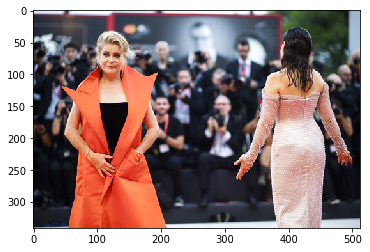

ID: dcbf64e6f0ad4218ab6cad5fdfd2e48a
HEADLINE: Italy Venice Film Festival 2019 The Truth Red Carpet
TAGS:  ['Milan', 'Italy', 'Western Europe', 'Europe', 'Movie premieres', 'Movies', 'Entertainment', 'Arts and entertainment', 'Celebrity', 'Film festivals', 'Celebrity red carpet', 'Venice Film Festival']


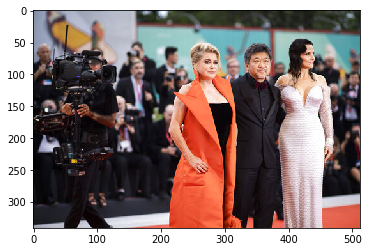

ID: 20b6b29475d24fc98c7c84b3cca409ef
HEADLINE: Italy Venice Film Festival 2019 The Truth Photo Call
TAGS:  ['Italy', 'Western Europe', 'Europe', 'Milan', 'Venice Film Festival', 'Celebrity', 'Entertainment', 'Arts and entertainment', 'Film festivals', 'Movies']


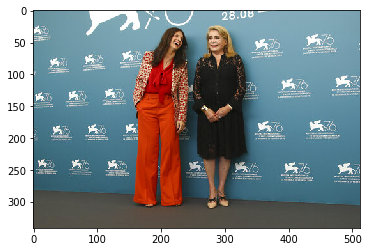

ID: 0b0b353b8c944187a2786d1750aa0c9e
HEADLINE: APTOPIX Italy Venice Collision
TAGS:  ['Italy', 'Western Europe', 'Europe', 'Milan']


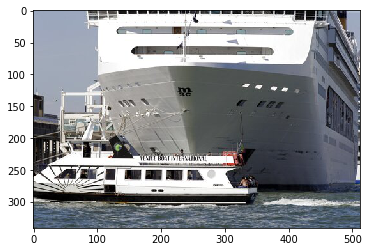

ID: 6fa12f09eb8d4bf592b1afeb58d47adc
HEADLINE: Italy Pope
TAGS:  ['Italy', 'Western Europe', 'Europe', 'Milan']


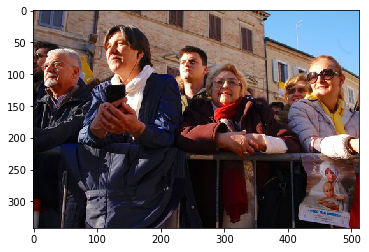

True images: 
ID: 873cae13ec85429ba9efcefb2e84c29f
HEADLINE: Italy Venice Film Festival 2019 Seberg Arrival
TAGS:  ['Italy', 'Western Europe', 'Europe', 'Milan', 'Celebrity', 'Entertainment', 'Arts and entertainment', 'Film festivals', 'Movies', 'Venice Film Festival']


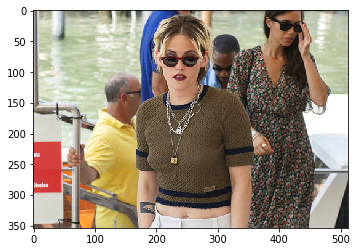

ID: 89496c709ce84243ba819d421d7f7eae
HEADLINE: Italy Venice Film Festival 2019 Seberg Photo Call
TAGS:  ['Milan', 'Italy', 'Western Europe', 'Europe', 'Film festivals', 'Movies', 'Entertainment', 'Arts and entertainment', 'Celebrity', 'Venice Film Festival']


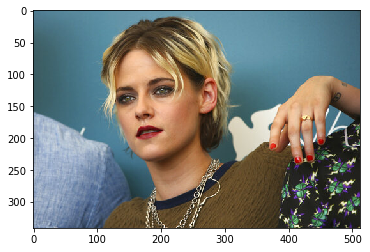

ID: d05661998a8846c086bf34460a0a0e8f
HEADLINE: Italy Venice Film Festival 2019 Seberg Arrival
TAGS:  ['Italy', 'Western Europe', 'Europe', 'Milan', 'Venice Film Festival', 'Celebrity', 'Entertainment', 'Arts and entertainment', 'Movies', 'Film festivals']


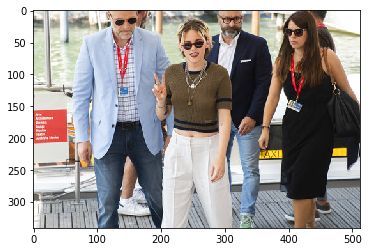

ID: 108616ec4a7c46bf84ce3222a591461b
HEADLINE: Italy Venice Film Festival 2019 Seberg Arrival
TAGS:  ['Italy', 'Western Europe', 'Europe', 'Milan', 'Movies', 'Entertainment', 'Arts and entertainment', 'Film festivals', 'Venice Film Festival', 'Celebrity']


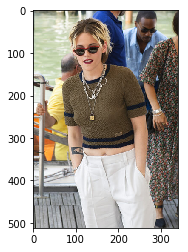

In [34]:
exp_id = 'a08454bb45204e18aa81830942e835cd' 
prediction_demo(exp_id, 5, False)